In [1]:
import os
import pandas as pd
import numpy  as np
from scipy.fft    import dct, idct
from scipy.signal import butter, savgol_filter, ellip, filtfilt, detrend
from matplotlib   import pylab as plt

## Load data

In [2]:
# paths were the preprocessed data is
root_path = 'data/'
data_path = os.path.join(root_path, 'Processed')
emg_path  = os.path.join(data_path, 'EMG')

# paths were the output should be
out_path = os.path.join(root_path, 'Running-happiness')

# check if the output folders exist and create them if necessary
for folder in [out_path]:
    if not os.path.exists(folder):
        os.mkdir(folder)

# list all files (ignoring the hidden macos file)
emg_files = [x for x in os.listdir(emg_path) if x.endswith('.csv')]
emg_files

['02_EMG_SS2023_Exp1_Session1_Shimmer_F16C_Calibrated_SD.csv',
 '04_EMG_SS2023_Exp1_Session1_Shimmer_EC93_Calibrated_SD.csv',
 '03_EMG_SS2023_Exp1_Session1_Shimmer_EC8E_Calibrated_SD.csv',
 '01_EMG_SS2023_Exp1_Session1_Shimmer_F0BA_Calibrated_SD.csv']

In [3]:
df = pd.DataFrame()

for file in emg_files:
    filepath = os.path.join(emg_path, file)
    if df.empty:
        df       = pd.read_csv(filepath)
        df['participant'] = int(file.split('_')[0])
    else:
        tmp_df = pd.read_csv(filepath)
        tmp_df['participant'] = int(file.split('_')[0])
        df = df.append(tmp_df)

df.head()

,timestamp_UNIX,CH1,CH2,trial,participant
0,1.677476e+12,1.755010,3.130216,1,2
1,1.677476e+12,1.754752,3.130092,1,2
2,1.677476e+12,1.754496,3.129968,1,2
3,1.677476e+12,1.754243,3.129843,1,2
4,1.677476e+12,1.753992,3.129720,1,2


## Plot data

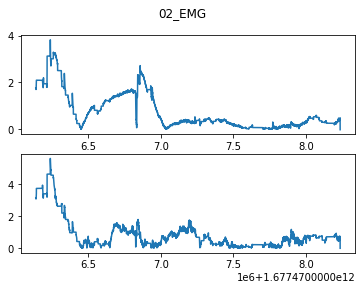

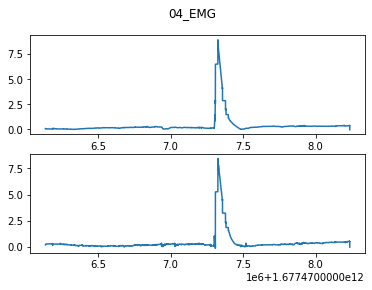

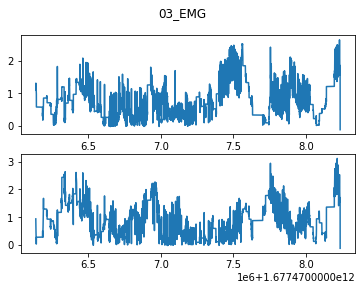

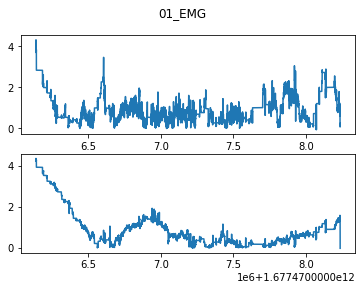

In [12]:
for file in emg_files:
#     filepath = os.path.join(emg_path, file)
#     df       = pd.read_csv(filepath)

    fig, ax = plt.subplots(2,1)
    ax[0].plot(df.timestamp_UNIX, df.CH1)
    ax[1].plot(df.timestamp_UNIX, df.CH2)
    plt.suptitle(file[:6])

## Normalize based on calibration

Average the maximal smile value and then divide each value by it. Then the measure should be mapped to speed.

In [ ]:
trial_calibration = 15
for file in emg_files:
#     filepath = os.path.join(emg_out_path, file)
#     df       = pd.read_csv(filepath)
    
    fig, ax = plt.subplots(2,1)
    ax[0].plot(df.timestamp_UNIX[df.trial == trial_2_plot], df.CH1[df.trial == trial_2_plot])
    ax[1].plot(df.timestamp_UNIX[df.trial == trial_2_plot], df.CH2[df.trial == trial_2_plot])
    plt.suptitle(file[:6])

## Mapping to speed
Map the percentage of the maximum voluntary contraction (RMS in the calibration) done in every sample of the EMG